In [74]:
import numpy as np
import pandas as pd
import yfinance as yf
from tqdm import tqdm
import pickle
from collections import defaultdict
import matplotlib.pyplot as plt

# Data Preprocessing

In [11]:
nyse_universe = pd.read_csv("Data/NYSE_universe.csv", header=[0, 1])

nyse_universe

Unnamed: 0_level_0 NVDA US Equity                \
     Unnamed: 0_level_1        PX_LAST   CUR_MKT_CAP   
0                  Date            NaN           NaN   
1                   NaN         5.6110  1.360106e+05   
2            2018-01-19         5.7528  1.394467e+05   
3            2018-01-22         5.8423  1.416161e+05   
4            2018-01-23         5.9727  1.447795e+05   
...                 ...            ...           ...   
1845         2025-02-12       131.1400  3.211619e+06   
1846         2025-02-13       135.2900  3.313252e+06   
1847         2025-02-14       138.8500  3.400436e+06   
1848         2025-02-17       138.8500  3.400436e+06   
1849         2025-02-18       139.4000  3.413906e+06   

                                                       MSFT US Equity  \
     MARKET_CAPITALIZATION_TO_BV     EBIT BS_TOT_ASSET        PX_LAST   
0                            NaN      NaN          NaN            NaN   
1                        21.4123      NaN          NaN            NaN   
2                        21.9532      NaN          NaN          90.00   
3                        22.2947      NaN          NaN          91.61   
4                        22.7927      NaN          NaN          91.90   
...                          ...      ...          ...            ...   
1845                     48.7355  21869.0      96013.0         409.04   
1846                     50.2777  21869.0      96013.0         410.54   
1847                     51.6007  21869.0      96013.0         408.43   
1848                     51.6007  21869.0      96013.0         408.43   
1849                     51.8051  21869.0      96013.0         409.64   

                                                         ... DTI US Equity  \
       CUR_MKT_CAP MARKET_CAPITALIZATION_TO_BV     EBIT  ...       PX_LAST   
0              NaN                         NaN      NaN  ...           NaN   
1     6.950846e+05                      8.8704      NaN  ...           NaN   
2     6.943131e+05                      8.8606      NaN  ...           NaN   
3     7.067336e+05                      9.0191      NaN  ...           NaN   
4     7.089708e+05                      9.0476      NaN  ...           NaN   
...            ...                         ...      ...  ...           ...   
1845  3.040796e+06                     10.0457  31653.0  ...          3.12   
1846  3.051947e+06                     10.0826  31653.0  ...          3.20   
1847  3.036261e+06                     10.0308  31653.0  ...          3.18   
1848  3.036261e+06                     10.0308  31653.0  ...          3.18   
1849  3.045257e+06                     10.0605  31653.0  ...          3.06   

                                                                  \
     CUR_MKT_CAP MARKET_CAPITALIZATION_TO_BV   EBIT BS_TOT_ASSET   
0            NaN                         NaN    NaN          NaN   
1            NaN                         NaN    NaN          NaN   
2            NaN                         NaN    NaN          NaN   
3            NaN                         NaN    NaN          NaN   
4            NaN                         NaN    NaN          NaN   
...          ...                         ...    ...          ...   
1845    111.0493                      0.9014  4.251      218.844   
1846    113.8968                      0.9246  4.251      218.844   
1847    113.1849                      0.9188  4.251      218.844   
1848    113.1849                      0.9188  4.251      218.844   
1849    108.9138                      0.8841  4.251      218.844   

     NTIC US Equity                                                  \
            PX_LAST CUR_MKT_CAP MARKET_CAPITALIZATION_TO_BV    EBIT   
0               NaN         NaN                         NaN     NaN   
1               NaN    107.6477                      2.1715  1.2846   
2           12.6250    114.5696                      2.3111  1.2846   
3           12.7624    115.8160                      2.3362  1.2846   


In [12]:
universe_tickers = []
for ticker in nyse_universe.columns[1::5]:
    universe_tickers.append(ticker[0][:-10])

universe_tickers

['NVDA',
 'MSFT',
 'AMZN',
 'GOOG',
 'GOOGL',
 'META',
 'TSLA',
 'AVGO',
 'BRK/A',
 'BRK/B',
 'WMT',
 'LLY',
 'JPM',
 'V',
 'MA',
 'ORCL',
 'XOM',
 'COST',
 'UNH',
 'NFLX',
 'HD',
 'PG',
 'JNJ',
 'BAC',
 'ABBV',
 'CRM',
 'TMUS',
 'KO',
 'PLTR',
 'CVX',
 'WFC',
 'CSCO',
 'IBM',
 'PM',
 'ABT',
 'GE',
 'MS',
 'LIN',
 'AXP',
 'MCD',
 'GS',
 'ISRG',
 'MRK',
 'NOW',
 'BX',
 'ADBE',
 'TMO',
 'DIS',
 'PEP',
 'QCOM',
 'T',
 'AMD',
 'APP',
 'VZ',
 'TXN',
 'CAT',
 'BKNG',
 'UBER',
 'SPGI',
 'RTX',
 'INTU',
 'C',
 'AMGN',
 'BSX',
 'PGR',
 'UNP',
 'BLK',
 'SCHW',
 'DHR',
 'SYK',
 'PFE',
 'LOW',
 'NEE',
 'AMAT',
 'ANET',
 'BA',
 'TJX',
 'CMCSA',
 'DE',
 'PANW',
 'HON',
 'FI',
 'GILD',
 'SBUX',
 'COP',
 'ADP',
 'KKR',
 'ETN',
 'MU',
 'VRTX',
 'INTC',
 'NKE',
 'MMC',
 'LRCX',
 'CRWD',
 'BMY',
 'ADI',
 'CEG',
 'GEV',
 'ABNB',
 'LMT',
 'KLAC',
 'IBKR',
 'UPS',
 'ICE',
 'SO',
 'MRVL',
 'MCO',
 'WM',
 'APO',
 'PH',
 'MO',
 'CME',
 'SHW',
 'ELV',
 'DASH',
 'FTNT',
 'MSTR',
 'DUK',
 'AON',
 'DELL',
 'CVS',


In [13]:
new_cols = ["date"]
for ticker in universe_tickers:
    new_cols += [f"{ticker}_price", f"{ticker}_mcap", f"{ticker}_marketbook", f"{ticker}_ebit", f"{ticker}_assets"]

new_cols

['date',
 'NVDA_price',
 'NVDA_mcap',
 'NVDA_marketbook',
 'NVDA_ebit',
 'NVDA_assets',
 'MSFT_price',
 'MSFT_mcap',
 'MSFT_marketbook',
 'MSFT_ebit',
 'MSFT_assets',
 'AMZN_price',
 'AMZN_mcap',
 'AMZN_marketbook',
 'AMZN_ebit',
 'AMZN_assets',
 'GOOG_price',
 'GOOG_mcap',
 'GOOG_marketbook',
 'GOOG_ebit',
 'GOOG_assets',
 'GOOGL_price',
 'GOOGL_mcap',
 'GOOGL_marketbook',
 'GOOGL_ebit',
 'GOOGL_assets',
 'META_price',
 'META_mcap',
 'META_marketbook',
 'META_ebit',
 'META_assets',
 'TSLA_price',
 'TSLA_mcap',
 'TSLA_marketbook',
 'TSLA_ebit',
 'TSLA_assets',
 'AVGO_price',
 'AVGO_mcap',
 'AVGO_marketbook',
 'AVGO_ebit',
 'AVGO_assets',
 'BRK/A_price',
 'BRK/A_mcap',
 'BRK/A_marketbook',
 'BRK/A_ebit',
 'BRK/A_assets',
 'BRK/B_price',
 'BRK/B_mcap',
 'BRK/B_marketbook',
 'BRK/B_ebit',
 'BRK/B_assets',
 'WMT_price',
 'WMT_mcap',
 'WMT_marketbook',
 'WMT_ebit',
 'WMT_assets',
 'LLY_price',
 'LLY_mcap',
 'LLY_marketbook',
 'LLY_ebit',
 'LLY_assets',
 'JPM_price',
 'JPM_mcap',
 'JPM_marke

In [14]:
nyse_universe.columns = new_cols
nyse_universe.loc[1, "date"] = "2018-01-18"
nyse_universe.drop(0, inplace=True)
nyse_universe.set_index("date", inplace=True)

nyse_universe

,NVDA_price,NVDA_mcap,NVDA_marketbook,NVDA_ebit,NVDA_assets,MSFT_price,MSFT_mcap,MSFT_marketbook,MSFT_ebit,MSFT_assets,...,DTI_price,DTI_mcap,DTI_marketbook,DTI_ebit,DTI_assets,NTIC_price,NTIC_mcap,NTIC_marketbook,NTIC_ebit,NTIC_assets
date,,,,,,,,,,,,,,,,,,,,,
2018-01-18,5.6110,1.360106e+05,21.4123,NaN,NaN,NaN,6.950846e+05,8.8704,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,107.6477,2.1715,1.2846,58.1958
2018-01-19,5.7528,1.394467e+05,21.9532,NaN,NaN,90.00,6.943131e+05,8.8606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.6250,114.5696,2.3111,1.2846,58.1958
2018-01-22,5.8423,1.416161e+05,22.2947,NaN,NaN,91.61,7.067336e+05,9.0191,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.7624,115.8160,2.3362,1.2846,58.1958
2018-01-23,5.9727,1.447795e+05,22.7927,NaN,NaN,91.90,7.089708e+05,9.0476,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.4750,113.2083,2.2836,1.2846,58.1958
2018-01-24,5.8950,1.428948e+05,22.4960,NaN,NaN,91.82,7.083537e+05,9.0397,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.2500,111.1665,2.2425,1.2846,58.1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-12,131.1400,3.211619e+06,48.7355,21869.0,96013.0,409.04,3.040796e+06,10.0457,31653.0,533898.0,...,3.12,111.0493,0.9014,4.251,218.844,11.1100,105.2173,1.4985,1.1067,94.0377
2025-02-13,135.2900,3.313252e+06,50.2777,21869.0,96013.0,410.54,3.051947e+06,10.0826,31653.0,533898.0,...,3.20,113.8968,0.9246,4.251,218.844,11.2800,106.8273,1.5215,1.1067,94.0377
2025-02-14,138.8500,3.400436e+06,51.6007,21869.0,96013.0,408.43,3.036261e+06,10.0308,31653.0,533898.0,...,3.18,113.1849,0.9188,4.251,218.844,11.2800,106.8273,1.5215,1.1067,94.0377


In [15]:
nyse_universe.to_csv("./Data/nyse_clean.csv")

In [16]:
sector_map = {}
errors = []
for ticker in tqdm(universe_tickers):
    try:
        sector_map[ticker] = yf.Ticker(ticker).info["sector"]
    except:
        errors.append(ticker)
        continue

100%|██████████| 2999/2999 [31:27<00:00,  1.59it/s]


In [23]:
remaining_tickers = errors
errors = []
for ticker in tqdm(remaining_tickers):
    try:
        sector_map[ticker] = yf.Ticker(ticker).info["sector"]
    except:
        errors.append(ticker)
        continue

100%|██████████| 57/57 [01:12<00:00,  1.26s/it]


In [67]:
sector_map["BRK/A"] = "Financial Services"
sector_map["BRK/B"] = "Financial Services"
sector_map["LEN/A"] = "Consumer Cyclical"
sector_map["LEN/B"] = "Consumer Cyclical"
sector_map["HEI/A"] = "Industrials"
sector_map["WSO/A"] = "Industrials"
sector_map["WSO/B"] = "Industrials"
sector_map["MKC/V"] = "Consumer Defensive"
sector_map["BF/A"] = "Consumer Defensive"
sector_map["BF/B"] = "Consumer Defensive"
sector_map["UHAL/B"] = "Industrials"
sector_map["TAP/A"] = "Consumer Defensive"

sector_map["BIO/B"] = "Healthcare"
sector_map["MOG/B"] = "Industrials"
sector_map["MOG/A"] = "Industrials"
sector_map["CWEN/A"] = "Utilities"
sector_map["GEF/B"] = "Consumer Cyclical"
sector_map["LGF/A"] = "Communication Services"
sector_map["LGF/B"] = "Communication Services"
sector_map["AGM/A"] = "Financial Services"
sector_map["MSDL"] = "Financial Services"
sector_map["KBDC"] = "Financial Services"

sector_map["NCDL"] = "Financial Services"
sector_map["SION"] = "Healthcare"
sector_map["EQV"] = "Financial Services"
sector_map["BH/A"] = "Consumer Cyclical"
sector_map["CRD/B"] = "Financial Services"
sector_map["CRD/A"] = "Financial Services"
sector_map["PSBD"] = "Financial Services"
sector_map["AAM"] = "Financial Services"
sector_map["GTN/A"] = "Communication Services"
sector_map["ORKA"] = "Healthcare"

sector_map["CCIX"] = "Financial Services"
sector_map["HVT/A"] = "Consumer Cyclical"
sector_map["BACQ"] = "Financial Services"
sector_map["GIG"] = "Financial Services"
sector_map["CUB"] = "Financial Services"
sector_map["POLE"] = "Financial Services"
sector_map["VCIC"] = "Financial Services"
sector_map["ALF"] = "Financial Services"
sector_map["MBAV"] = "Financial Services"
sector_map["HOND"] = "Financial Services"

sector_map["DRDB"] = "Financial Services"
sector_map["VACH"] = "Financial Services"
sector_map["FACT"] = "Financial Services"
sector_map["NTWO"] = "Financial Services"
sector_map["JACS"] = "Financial Services"
sector_map["PLMK"] = "Financial Services"
sector_map["MLAC"] = "Financial Services"
sector_map["HVII"] = "Financial Services"
sector_map["LPAA"] = "Financial Services"
sector_map["SIMA"] = "Financial Services"

sector_map["LPBB"] = "Financial Services"
sector_map["OACC"] = "Financial Services"
sector_map["WLAC"] = "Financial Services"
sector_map["CLBR"] = "Financial Services"
sector_map["MACI"] = "Financial Services"
sector_map["RANG"] = "Financial Services"
sector_map["CHAR"] = "Financial Services"

In [ ]:
# DONT TOUCH!!!
# with open("Data/sector_map.pkl", "wb") as f:
#     pickle.dump(sector_map, f)
# with open("Data/universe_tickers.pkl", "wb") as f:
#     pickle.dump(universe_tickers, f)

# Buidling Stuff Out

In [ ]:
# test = defaultdict(list)
# mcap_c = [f"{ticker}_mcap" for ticker in universe_tickers]
# latest_data = nyse_universe.iloc[-1].copy()

# for ticker in universe_tickers:
#     test[sector_map[ticker]].append(latest_data[f"{ticker}_mcap"])



In [ ]:
# Testing out different ways for measuring concentration of each sector
# HHI gives interesting results, within industries tech isn't even the most concentrated
# But I think it's not too relevant to the question
# results = {}
# for key, value in test.items():
#     sector_mcaps = np.nan_to_num(value, nan=0)
#     hhi = ((sector_mcaps/sum(sector_mcaps))**2).sum()
#     norm_hhi = (hhi - 1/len(value))/(1 - 1/len(value))

#     results[key] = norm_hhi

In [107]:
mcap_c = [f"{ticker}_mcap" for ticker in universe_tickers]
mcap_df = nyse_universe[mcap_c].copy()

for date, row in mcap_df[:10].iterrows():
    print(row.sort_values(ascending=False).head(20))

GOOG_mcap     786969.2073
GOOGL_mcap    786969.2073
MSFT_mcap     695084.5590
AMZN_mcap     623214.9214
BRK/A_mcap    526141.0258
BRK/B_mcap    526141.0258
META_mcap     522464.4129
JNJ_mcap      394703.5257
JPM_mcap      392981.1189
XOM_mcap      370450.1843
BAC_mcap      323844.2805
WFC_mcap      314906.5197
WMT_mcap      308976.3847
V_mcap        307105.4766
CVX_mcap      249938.6152
UNH_mcap      235638.4409
HD_mcap       231599.5836
PG_mcap       228782.8797
T_mcap        228063.8500
PFE_mcap      220486.5637
Name: 2018-01-18, dtype: float64
GOOG_mcap     792271.9374
GOOGL_mcap    792271.9374
MSFT_mcap     694313.1000
AMZN_mcap     623822.0803
META_mcap     526794.0679
BRK/B_mcap    526400.5790
BRK/A_mcap    526400.5790
JNJ_mcap      395885.5946
JPM_mcap      392113.6875
XOM_mcap      369263.7946
BAC_mcap      326313.2331
WFC_mcap      316236.0703
WMT_mcap      309835.4753
V_mcap        306082.7063
CVX_mcap      249387.7967
UNH_mcap      235822.5637
HD_mcap       235102.8295
PG_mc

In [130]:
ff_df = pd.read_csv("Data/FF_data.csv")
smb_df = ff_df[ff_df["Unnamed: 0"] >= 20180101][["SMB"]].copy()
smb_df["SMB_rate"] = (smb_df["SMB"]/100) + 1
smb_df["wealth"] = smb_df["SMB_rate"].cumprod()

smb_df["wealth"]

13720    1.003000
13721    0.998386
13722    0.996190
13723    0.992504
13724    0.990519
           ...   
15476    0.778381
15477    0.786866
15478    0.783404
15479    0.785284
15480    0.787718
Name: wealth, Length: 1761, dtype: float64

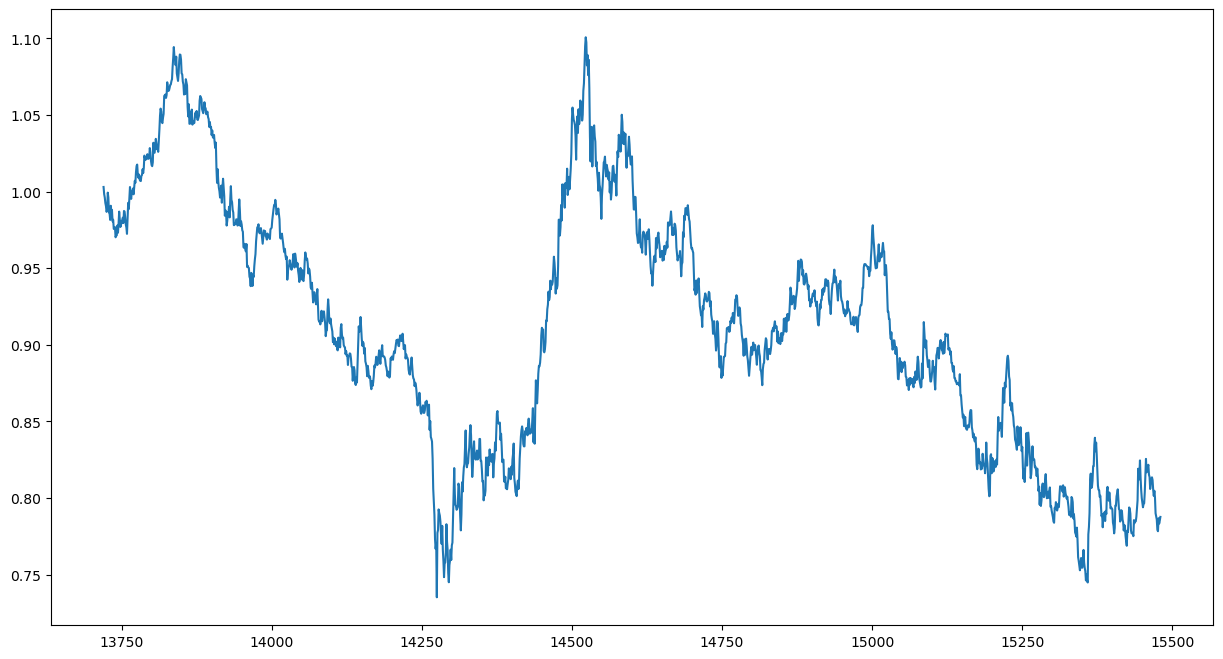

In [133]:
plt.figure(figsize=(15, 8))

plt.plot(smb_df["wealth"])